## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [2]:
# Combine the data into a single dataset
combination_df = pd.merge(mouse_metadata, study_results,how = 'outer', on = 'Mouse ID')

# Display the data table for preview
combination_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_mice = combination_df['Mouse ID'].nunique()
number_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combination_df.loc[combination_df.duplicated(subset = ['Mouse ID', "Timepoint"]), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id = combination_df.loc[combination_df['Mouse ID'] == 'g989', :]
duplicate_mice_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combination_df[combination_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data_mice = clean_data['Mouse ID'].nunique()
clean_data_mice

248

## Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
variance_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()


#Dataframe

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean_stat, 
                            "Median Tumor Volume":median_stat, 
                           "Tumor Volume Variance":variance_stat, 
                           "Tumor Volume Std. Deviation.":std_stat, 
                           "Tumor Volume Std. Error.":sem_stat})

# Display the Summary statistics table grouped by 'Drug Regimen' column

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation.,Tumor Volume Std. Error.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
#Create series for each "drug regimen"

count_df = clean_data['Drug Regimen'].value_counts()
count_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Mice Per Treatment')

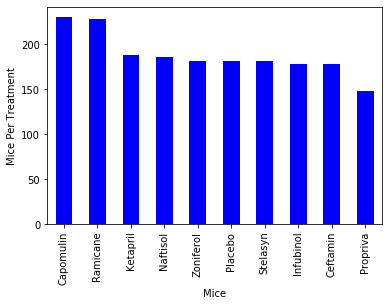

In [11]:
#Create pandas plot using group series above + adding labels

pandas_plot = count_df.plot.bar(color='b')  

# Give the chart a title, x label, and y label
plt.xlabel("Drug Regimen")
plt.xlabel("Mice")
plt.ylabel("Mice Per Treatment")

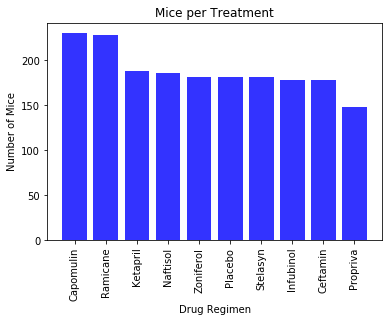

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = count_df.index.values
y_axis = count_df.values

#Create Pyplot Chart
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods

plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

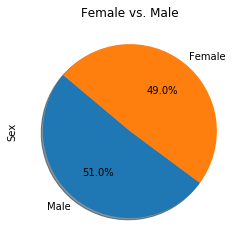

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data['Sex'].value_counts()
plt.title ('Female vs. Male')
gender.plot.pie(autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

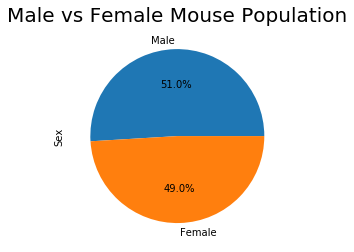

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane= clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol= clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin= clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]



In [21]:
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
Capomulin_last = Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_last)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Capomulin_merge = pd.merge(Capomulin_volume, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [22]:
# Capomulin quartiles and IQR & Determine Upper & Lower bound

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [23]:
#Ramicane

#Start by getting the last (greatest) timepoint for each mouse & Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Ramicane_last = Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_volume, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

#Ramicane quartiles and IQR & Determine Upper & Lower bound

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [24]:
#Infubinol
#Start by getting the last (greatest) timepoint for each mouse & Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_last = Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_volume, clean_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [25]:
#Infubinol quartiles and IQR & Determine Upper & Lower bound
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [26]:
#Ceftamin
#Start by getting the last (greatest) timepoint for each mouse & Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_last = Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_volume,clean_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [27]:
#Ceftamin quartiles and IQR & Determine Upper & Lower bound

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


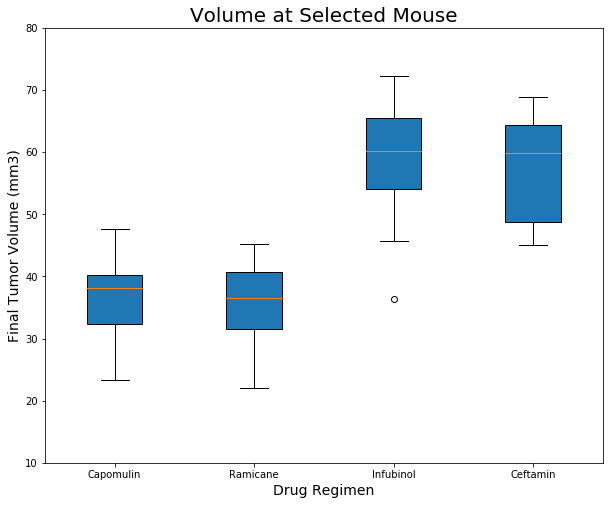

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Volume at Selected Mouse',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

In [29]:
line_scatter = Capomulin.loc[Capomulin["Mouse ID"] == "m601",:]
line_scatter.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1


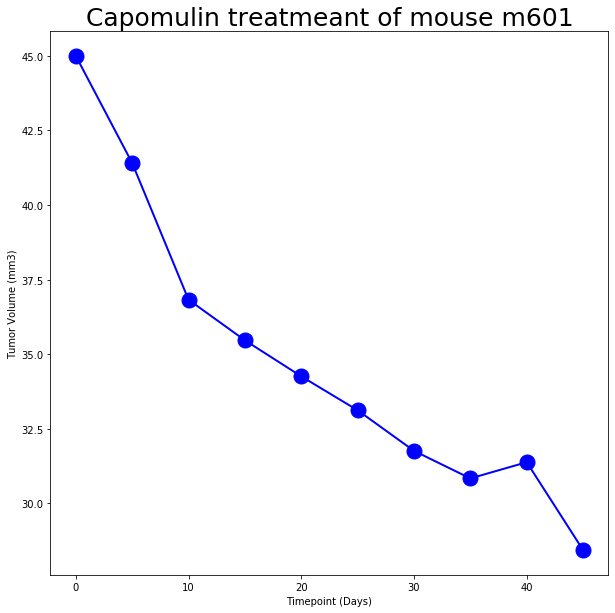

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = line_scatter["Timepoint"]
tumor_size = line_scatter["Tumor Volume (mm3)"]

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Capomulin treatmeant of mouse m601',fontsize =25)
plt.plot(x_axis, tumor_size,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize =10)


plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()

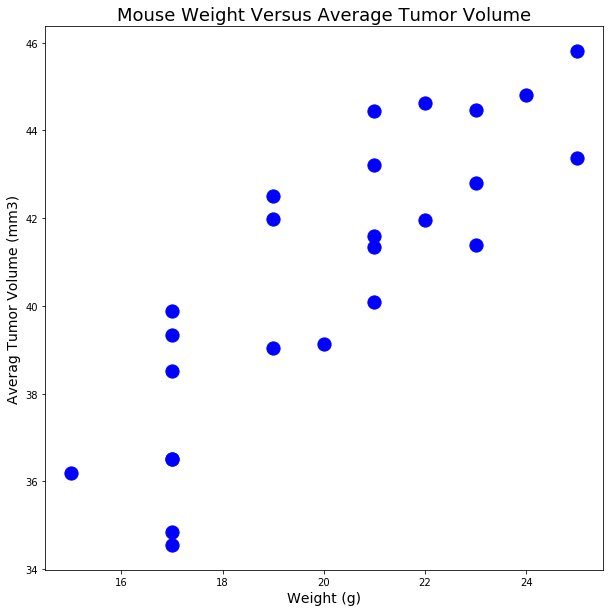

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig, ax = plt.subplots(figsize=(10, 10))
capomulin_mean_df =Capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(capomulin_mean_df['Weight (g)'],capomulin_mean_df['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =18)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(capomulin_mean_df['Weight (g)'],capomulin_mean_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [46]:
x_values = capomulin_mean_df['Weight (g)']
y_values = capomulin_mean_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"rvalue (Correlation coefficient): {rvalue}")
print(f"pvalue: {pvalue}")
print(f"stderr: {stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope: 0.9544396890241045
intercept: 21.552160532685015
rvalue (Correlation coefficient): 0.8419363424694718
pvalue: 1.3225722434712642e-07
stderr: 0.1275435903320134
y = 0.95x + 21.55
